# Realize Du et al Simplifications

##### imports

In [8]:
import pandas as pd
from matplotlib import pyplot as plt
data = "./data/see_course2060_12-11_to_11-12_logs_filtered.csv"

##### get initial database

In [9]:
all_logs_data = pd.read_csv(data, index_col="id").sort_values("t")
all_logs_data.head()

,userid,t,component,action,target,objectid,objecttable,courseid,relateduserid,extra_info,crud,assignment_id
id,,,,,,,,,,,,
164847618,91614,1573584504,core,viewed,course,NaN,NaN,2060,NaN,N;,r,NaN
164847708,132616,1573584529,core,viewed,course,NaN,NaN,2060,NaN,N;,r,NaN
164847712,91614,1573584531,mod_resource,viewed,course_module,5846.0,resource,2060,NaN,N;,r,NaN
164847718,91614,1573584532,mod_resource,viewed,course_module,5846.0,resource,2060,NaN,N;,r,NaN
164847717,91614,1573584532,mod_resource,viewed,course_module,5846.0,resource,2060,NaN,N;,r,NaN


##### partion the db in four diferent ones, one for each activitie, and sort this new dbs from the oldest event to the newest

In [10]:
first_logs = all_logs_data.query("t >= 1573527600").query("t <= 1574218500").query("assignment_id == 12841")
first_logs.to_csv("see_course2060_first_activity_logs.csv")

second_logs = all_logs_data.query("t >= 1574132400").query("t <= 1574823300").query("assignment_id == 12842")
second_logs.to_csv("see_course2060_second_activity_logs.csv")

third_logs = all_logs_data.query("t >= 1574737200").query("t <= 1575428100").query("assignment_id == 12843")
third_logs.to_csv("see_course2060_third_activity_logs.csv")

fourth_logs = all_logs_data.query("t >= 1575342000").query("t <= 1576032900").query("assignment_id == 12844")
fourth_logs.to_csv("see_course2060_fourth_activity_logs.csv")

first_access = all_logs_data.sort_values("userid").query("component == 'core'").drop_duplicates(subset=['userid'])
first_access.to_csv("first_access_logs.csv")

In [11]:
first_logs.head()

,userid,t,component,action,target,objectid,objecttable,courseid,relateduserid,extra_info,crud,assignment_id
id,,,,,,,,,,,,
164848399,137967,1573584719,mod_quiz,viewed,course_module,12841.0,quiz,2060,NaN,N;,r,12841.0
164848417,137967,1573584723,mod_quiz,started,attempt,2359002.0,quiz_attempts,2060,137967.0,N;,c,12841.0
164849267,68944,1573584960,mod_quiz,viewed,course_module,12841.0,quiz,2060,NaN,N;,r,12841.0
164849443,121003,1573584999,mod_quiz,viewed,course_module,12841.0,quiz,2060,NaN,N;,r,12841.0
164849543,121003,1573585018,mod_quiz,started,attempt,2359031.0,quiz_attempts,2060,121003.0,N;,c,12841.0


In [12]:
first_access.head()

,userid,t,component,action,target,objectid,objecttable,courseid,relateduserid,extra_info,crud,assignment_id
id,,,,,,,,,,,,
168677319,239,1575413576,core,viewed,course,NaN,NaN,2060,NaN,N;,r,NaN
168393112,275,1575295709,core,viewed,course,NaN,NaN,2060,NaN,N;,r,NaN
165438519,438,1573765502,core,viewed,course,NaN,NaN,2060,NaN,N;,r,NaN
169176153,739,1575646210,core,viewed,course,NaN,NaN,2060,NaN,N;,r,NaN
165740200,1479,1573955158,core,viewed,course,NaN,NaN,2060,NaN,N;,r,NaN


##### get the length of each db and plot a bar chart showing how many events was for each acitivity

In [13]:
first_logs_size = len(first_logs.index)
second_logs_size = len(second_logs.index)
third_logs_size = len(third_logs.index)
fourth_logs_size = len(fourth_logs.index)
first_access_log_size = len(first_access.index)
total_size = len(all_logs_data.index)

print(first_logs_size + second_logs_size + third_logs_size + fourth_logs_size)

43702


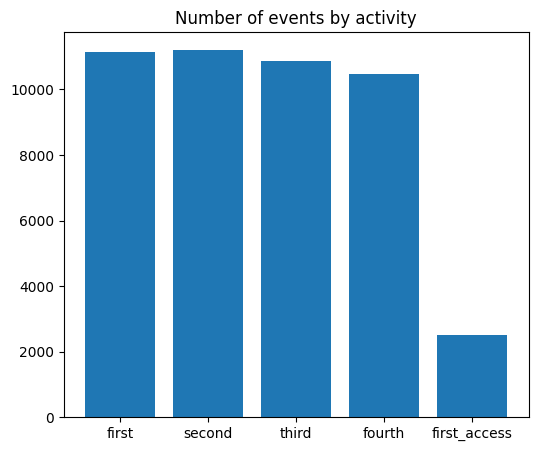

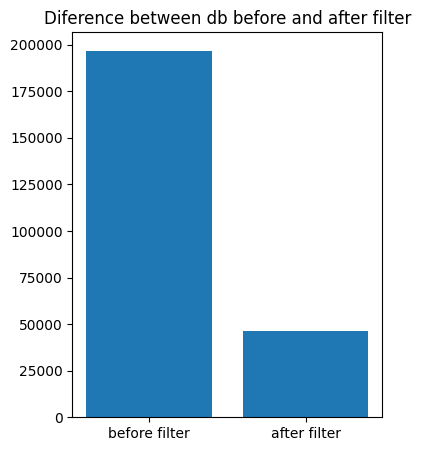

In [17]:
fig = plt.figure(figsize=(6, 5))
sizes = [first_logs_size, second_logs_size, third_logs_size, fourth_logs_size, first_access_log_size]
plt.bar(["first", "second", "third", "fourth", "first_access"], sizes)
plt.title("Number of events by activity")
plt.show()

fig = plt.figure(figsize=(4, 5))
total_logs_size = 0
for i in sizes:
    total_logs_size += i
plt.bar(["before filter", "after filter"], [total_size, total_logs_size])
plt.title("Diference between db before and after filter")
plt.show()